# Navigation

---

This notebook contains the solution of the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### The Environment

It uses the Banana environment from [Unity Technologies](https://github.com/Unity-Technologies/ml-agents/blob/main/docs/Learning-Environment-Examples.md#banana-collector).

![environment](banana.gif)

The goal for the agent is to navigate through the environment and collect yellow bananas and avoiding blue bananas.

The task is episodic and in order to solve the environment, the agent must get an average score of `+13` over `100` consecutive episodes.

Please note, that the files `dqn_agent.py` as well as `model.py` are needed.

### State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  
A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = UnityEnvironment(file_name="../Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


## Train agent

In [5]:
from dqn_agent import Agent
from collections import deque
import torch

In [6]:
def dqn(n_episodes=2000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, train=False, score_target=float('inf')):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        train (bool): train agent or apply best actions
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon

    for i_episode in range(1, n_episodes+1):

        env_info = env.reset(train_mode=train)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score

        while True:

            action = agent.act(state)                      # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished

            if train:
                agent.step(state, action, reward, next_state, done)

            score += reward                                # update the score

            state = next_state                             # roll over the state to next time step
            
            if done:                                       # exit loop if episode finished
                break

        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score

        eps = max(eps_end, eps_decay*eps) # decrease epsilon

        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")

        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))

        if np.mean(scores_window)>= score_target:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break

    return scores   

In [8]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

scores = dqn(train=True, score_target=14)

Episode 100	Average Score: 0.47
Episode 200	Average Score: 4.64
Episode 300	Average Score: 7.13
Episode 400	Average Score: 11.21
Episode 500	Average Score: 12.36
Episode 553	Average Score: 14.01
Environment solved in 453 episodes!	Average Score: 14.01


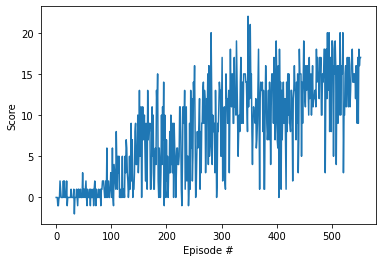

In [ ]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
plt.savefig("plot.jpg")

### Conclusions

The algorithm reaches the required score of +13 somewhere between 300 and 400 episodes.  
The score window of the last 100 scores achieves an average score of 14 or higher in 453 episodes.

## Run agent

In [10]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

scores = dqn(n_episodes=1, train=False)

Episode 1	Average Score: 15.00

In [11]:
env.close()